# Colored Camel 🐫

## Definizione di Tipi ed Eccezioni

Definisco i tipi di dato `Grafo`e `Problema`

In [16]:
type grafo = Grafo of (int -> int list);;
type problema = Problema of grafo * int * int;;

type grafo = Grafo of (int -> int list)


type problema = Problema of grafo * int * int


In [17]:
exception InsufficentColorNumber;;

exception InsufficentColorNumber


## Definizione dei Problemi

Definisco i vari grafi e problemi che andrò ad utilizzare

In [18]:
let problema_1 =
  let x = function        
        0 -> [1; 2]
      | 1 -> [0; 2; 3]
      | 2 -> [0; 1]
      | 3 -> [1; 4]
      | 4 -> [3]
      | 5 -> [6]
      | _ -> [] in
  let start = 3 in       (* Partenza *)
  let maxColors = 3 in   (* Massimo numero di colori*)
  let succ = Grafo x in  (* Successori *)

  (Problema (succ, start, maxColors))
;;

val problema_1 : problema = Problema (Grafo <fun>, 3, 3)


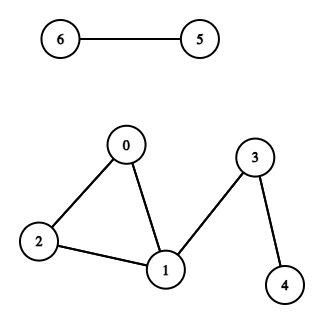

In [19]:
let problema_2_err = 
  let x = function        
        0 -> [1; 2; 3; 4; 5]
      | 1 -> [0; 3]
      | 2 -> [0; 5; 4]
      | 3 -> [0; 1; 4]
      | 4 -> [0; 3; 2; 5]
      | 5 -> [0; 2; 4]
      | _ -> [] in

    let start = 0 in            (* Partenza *)
    let maxColors = 3 in        (* Massimo numero di colori*)
    let succ = Grafo x in  (* Successori *)
    
    (Problema (succ, start, maxColors))
;;

val problema_2_err : problema = Problema (Grafo <fun>, 0, 3)


In [20]:
let problema_2 = 
  let x = function        
        0 -> [1; 2; 3; 4; 5]
      | 1 -> [0; 3]
      | 2 -> [0; 5; 4]
      | 3 -> [0; 1; 4]
      | 4 -> [0; 3; 2; 5]
      | 5 -> [0; 2; 4]
      | _ -> [] in

    let start = 0 in            (* Partenza *)
    let maxColors = 4 in        (* Massimo numero di colori*)
    let succ = Grafo x in  (* Successori *)
    
    (Problema (succ, start, maxColors))
;;

val problema_2 : problema = Problema (Grafo <fun>, 0, 4)


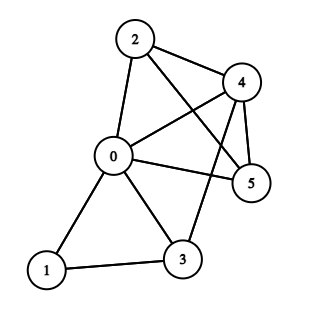

## Funzioni Ausiliarie

In [21]:
let get_colore nodo colorati = 
  let rec aux nodo = function (*lista di nodi colorati*)
      (x,y)::coda ->    (*caso ricorsivo, prende il primo elemento della forma (x,y)*)
        if x = nodo     (*  se l'elemento in questione è il nodo che cerco*)
          then y        (*    ritorna il colore del nodo*)
        else 
          aux nodo coda (*  continua con la ricorsione*)

      | _ -> (-1)       (*se la lista finisce vuol dire che il nodo non è colorato.*)

  in aux nodo colorati   (*avvia la ricorsione cone nodo=nodo lista_di_nodi_colorati=colorati*)
;;

val get_colore : 'a -> ('a * int) list -> int = <fun>


In [22]:
let rec max_lista = function   (* lista su cui trovare il massimo *)
     [x]      -> x                      (*caso base, la lista ha un solo elemento. Ritrona lui come massimo*)
    | x::coda -> max x (max_lista coda) (*caso ricorsivo, prende il primo elemento e trova il massimo tra lui e gli altri.*)
    | _       -> 0                      (*in tutti gli altri casi [per essere sicuro]*)
;;

val max_lista : int list -> int = <fun>


In [23]:
let rec tutti_colori_vicini vicini colorati =
  let rec aux risultato = function (*lista di nodi*)
      []        -> risultato   (*caso base, non ci sono più nodi di cui prendere il colore. Ritorna tutti i colori trovati*)
    | x::coda   ->             (*caso ricorsivo, esamina il primo nodo*)
      aux 
          (risultato@[get_colore x colorati]) (*aggiunge al risultato il colore del nodo analizzato*)
          coda                                (*toglie il nodo analizzato dalla lista e continua*)
  
  in aux [] vicini   (*avvia la ricorsione con risultato=[] e lista_di_nodi=vicini*)
;;

val tutti_colori_vicini : 'a list -> ('a * int) list -> int list = <fun>


In [24]:
let max_colore_vicini (Grafo succ) nodo colorati =
  let vicini = (succ nodo) in                                     (*prende i vicini del nodo*)            
    let colori_vicini = tutti_colori_vicini vicini colorati in    (*  prende tutti i colori dei vicini*)
      max_lista colori_vicini                            (*calcola il massimo tra tutti i colori presi*)
;;

val max_colore_vicini : grafo -> int -> (int * int) list -> int = <fun>


In [25]:
let calcola_lista_colori maxColori = 
  let rec aux risultato = function (* colore *)
      0 -> List.rev risultato               (*caso base, tutti i colori analizzati. Ritorna la lista invertita [con il giusto ordine]*)
    | x -> 
      aux                                   (*caso ricorsivo, somma al risultato il colore precedente all'attuale per trovare un nuovo colore*)
        (risultato@[(x-1)])                 (* aggiunge il numero alla lista*)
        (x-1)                               (* continua con il nuovo numero*)
  in aux [] maxColori     (*avvia la funzione con risultato=[] e colore=maxColori*)
;;

val calcola_lista_colori : int -> int list = <fun>


In [26]:
let lista_colori = ref [0;];;

val lista_colori : int list ref = {contents = [0]}


In [27]:
let scegli_colore (Grafo succ) nodo colorati = 
  let vicini = succ nodo in                                         (*tutti i vicini del nodo*)
    let colori_vicini = tutti_colori_vicini vicini colorati in      (*tutti i colori vicini del nodo*)
      let rec cerca_colore_nonusato = function (* lista colori da provare*)
        []        -> raise InsufficentColorNumber;    (*caso base, non ci sono colori disponibili*)
        |x::coda  ->                                  (*caso ricorsivo, analizza il colore*)
          if List.mem x colori_vicini                 (* il colore è tra i colori vicini*)
            then
              cerca_colore_nonusato coda              (*  continua la ricorsione ignorandolo*)
        else                                          (* il colore non è tra i vicini*)
          x                                           (*  trovato! Lo ritorna*)
        in cerca_colore_nonusato !lista_colori      (*avvia la ricorsione con la lista di colori*)
;;

val scegli_colore : grafo -> int -> (int * int) list -> int = <fun>


In [28]:
let incrementa_colore_nodi risultato nodi colore = 
  List.map (fun(x, y) -> if ((List.mem x nodi) && (colore=(get_colore x risultato))) then (x, y+1) else (x, y)) risultato
;;

val incrementa_colore_nodi :
  ('a * int) list -> 'a list -> int -> ('a * int) list = <fun>


In [29]:
let inizializza_risultato (Grafo succ) partenza =
  let rec bfs visitati risultato = function (* frontiera *)
      [] -> risultato
    | nodo::coda ->
      if List.mem nodo visitati
        then 
          bfs visitati risultato coda
      else
        bfs 
          (visitati@[nodo])
          (risultato@[(nodo, 0)])
          (coda@(succ nodo)) 

      in bfs [] [] [partenza]
    ;;

val inizializza_risultato : grafo -> int -> (int * int) list = <fun>


In [30]:
let controlla_risultato risultato maxColori = 
  let rec aux = function (* risultato *)
      [] -> true
    | (nodo,colore)::coda ->
      if colore >= maxColori
        then 
          false
      else
        aux coda
  in aux risultato
;; 

val controlla_risultato : ('a * 'b) list -> 'b -> bool = <fun>


## Funzione Principale

In [31]:
let colora (Problema ((Grafo succ), partenza, maxColori)) =
  let risultato = inizializza_risultato (Grafo succ) partenza in
  let rec esplora visitati colorati = 
    function (*frontiera*)
        []            ->  (*fine delle ricorsione, se la frontiera è vuota la colorazione è finita*)
          if controlla_risultato colorati maxColori 
            then colorati
          else 
            raise InsufficentColorNumber
      | nodo::coda    ->           (*caso ricorsivo, continua a colorare*)
        if List.mem nodo visitati              (*se il nodo è già stato visitato*)
          then esplora visitati colorati coda  (* ignora il nodo ed estrae il successivo dalla frontiera*)
        
        else 
          (*continua con la ricorsione espandendo i nodi vicini al nodo*)
          esplora 
                (visitati@[nodo])                                                        (*aggiunge il nodo attuale ai visitati*)
                (incrementa_colore_nodi colorati (succ nodo) (get_colore nodo colorati)) (*colora il nodo [aggiunge la coppia (nodo,colore) a colorati]*)
                (coda@(succ nodo))                                                       (*espande i vicini del nodo attuale e li aggiunge alla frontiera*)
      
  in esplora [] risultato [partenza]
;;

val colora : problema -> (int * int) list = <fun>


In [32]:
colora problema_1;;

- : (int * int) list = [(3, 0); (1, 2); (4, 1); (0, 0); (2, 1)]
